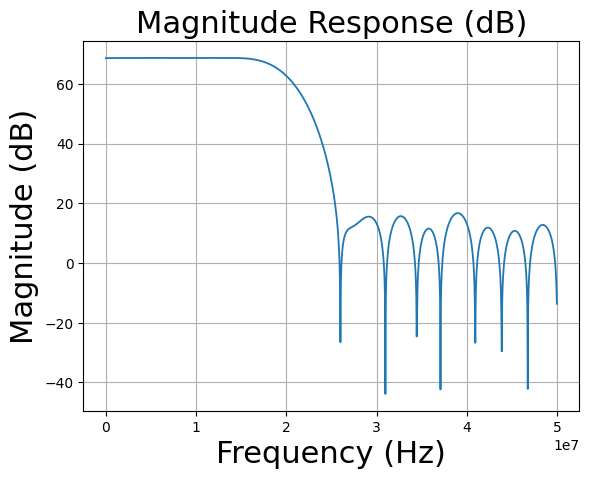

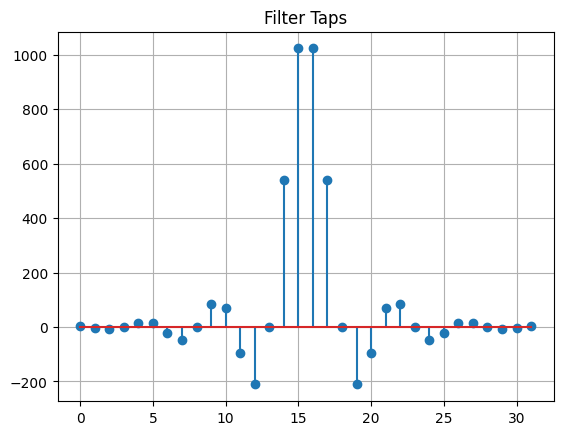

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz


# Setup parameters
Sample_Rate = 100e6
cutoff_frequency = 20e6
number_of_filter_taps = 32
filter_taps_bitwidth = 11
lowpass_highpass = 'lowpass'     # 'lowpass' or 'highpass'

# Calculate the taps
Nyquist_frequency = Sample_Rate / 2
Wn = cutoff_frequency / Nyquist_frequency

filter_taps = firwin(
    numtaps=number_of_filter_taps,
    cutoff=Wn,
    pass_zero=lowpass_highpass
)

# =========================
# Quantization
# =========================
max_val = np.max(np.abs(filter_taps))
filter_taps = np.floor(
    filter_taps / max_val * (2**(filter_taps_bitwidth - 1) - 1)
)

filter_taps_zero_padded = np.concatenate(([0], filter_taps))

# =========================
# Frequency response
# =========================
N = 1024
f, H = freqz(filter_taps, worN=N, fs=Sample_Rate)

magnitude = np.abs(H)

# =========================
# Plot magnitude response
# =========================
plt.figure()
plt.plot(f, 20 * np.log10(magnitude), linewidth=1.3)
plt.grid(True)
plt.title('Magnitude Response (dB)', fontsize=22)
plt.xlabel('Frequency (Hz)', fontsize=22)
plt.ylabel('Magnitude (dB)', fontsize=22)
plt.show()

# =========================
# Stem plot of filter taps
# =========================
plt.figure()
plt.stem(filter_taps) #use_line_collection=True
plt.grid(True)
plt.title("Filter Taps")
plt.show()

In [2]:
print(filter_taps)

[   2.   -4.   -8.    0.   16.   14.  -21.  -46.    0.   83.   69.  -94.
 -211.    0.  541. 1023. 1023.  541.    0. -211.  -94.   69.   83.    0.
  -46.  -21.   14.   16.    0.   -8.   -4.    2.]
